In [37]:
# Import the Necessary python libraries

import pandas as pa
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
# Load the data

classify1=pa.read_csv("Unemployment in India.csv")
# This dataset contains all months data of year 2019
print(classify1)
print()
classify1.info() 
# THis method will give exact data information type and non-null values of first dataset
# It has total 768 data points and 7 columns
# So, lets lookout another dataset which will help us.
classify2=pa.read_csv("Unemployment_Rate_upto_11_2020.csv")
print()
print(classify2)
# While this dataset contains first 10 months of the year 2020
print()
classify2.info()
# This will give us the data information about which datatype and non- null values of dataset 2

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

In [39]:
# Preprocessing and Data Cleaning

# Lets check whether the data sets have any null points in dataset 1
print()
print(classify1.isnull().sum())
# lets us check we can find any null data in the dataset 2
print()
print(classify2.isnull().sum())
# As we see that the classify1 have sum null values so lets drop them
classify1=classify1.dropna()
print()
print(classify1.isnull().sum())
print()
print(classify1.shape)
print(classify2.shape)


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         

In [40]:
# As we can see that there are no null values in the both dataset
# For our better understanding , we will rename the columns of our data to simplest
classify1.columns=["State","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Area"]
classify2.columns=["State","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region","Longitude","Latitude"]
# Lets check whether changes are applied or not
print(classify1.info(),"\n")
print(classify2.info(),"\n")

#Visualization of the data

print(classify1.describe(),"\n")
print(classify2.describe(),"\n")
# It will give us the statistical information about the data

print(classify1.corr())
print(classify2.corr())
# Let us take correlation of the data so we can use that information to analyze the data

print(classify1["State"].value_counts(),"\n")
print(classify2['State'].value_counts(),"\n")
# This will give us the data about each state frequency in the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated Unemployment Rate          740 non-null    float64
 4   Estimated Employed                   740 non-null    float64
 5   Estimated Labour Participation Rate  740 non-null    float64
 6   Area                                 740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   S

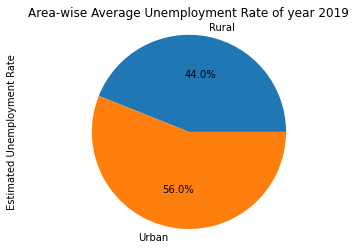

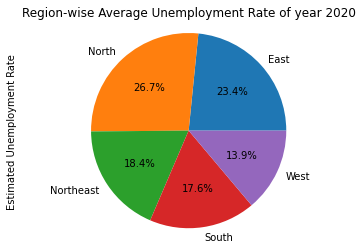

In [41]:
# let's see the distruibution of the average unemployment rates across areas of the year 2019
average_of_regions1=classify1.groupby("Area")["Estimated Unemployment Rate"].mean()
average_of_regions1.plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.title('Area-wise Average Unemployment Rate of year 2019')
plt.show()

# let's see the distruibution of the average unemployment rates across regions of the year 2020
average_of_regions2=classify2.groupby("Region")["Estimated Unemployment Rate"].mean()
average_of_regions2.plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.title('Region-wise Average Unemployment Rate of year 2020')
plt.show()

# lets visualize the average of each state and area wise estimated unemployment rate of year 2019
filtered_data = classify1[classify1['Area'].isin(['Rural', 'Urban'])]
avg_unemployment = filtered_data.groupby(['State', 'Area'])['Estimated Unemployment Rate'].mean().reset_index()

figure = px.sunburst(avg_unemployment, path=["State", "Area"], values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdYlGn", 
                     title="Average Unemployment Rate by State and Area")

figure.show()


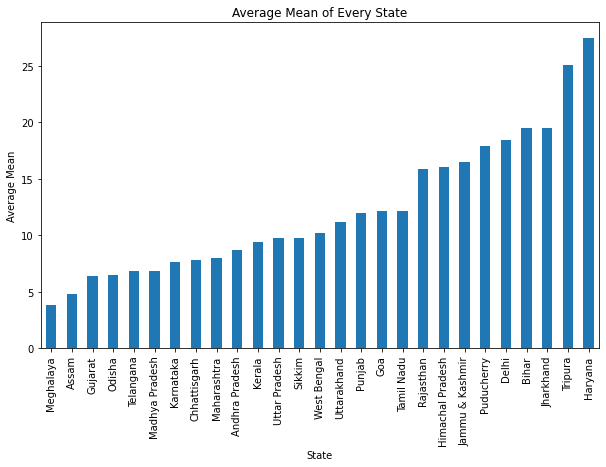

In [42]:
# Calculate the average mean of Unemployment rate for each state in the year 2020
state_avg_mean = classify2.groupby('State')['Estimated Unemployment Rate'].mean()
# Sort the data in ascending order of the average mean
state_avg_mean = state_avg_mean.sort_values(ascending=True)

# Create a bar plot for the average mean of every state
state_avg_mean.plot(kind='bar', figsize=(10, 6))

# Set the labels and title of the plot
plt.xlabel('State')
plt.ylabel('Average Mean')
plt.title('Average Mean of Every State')

# Display the plot
plt.show()


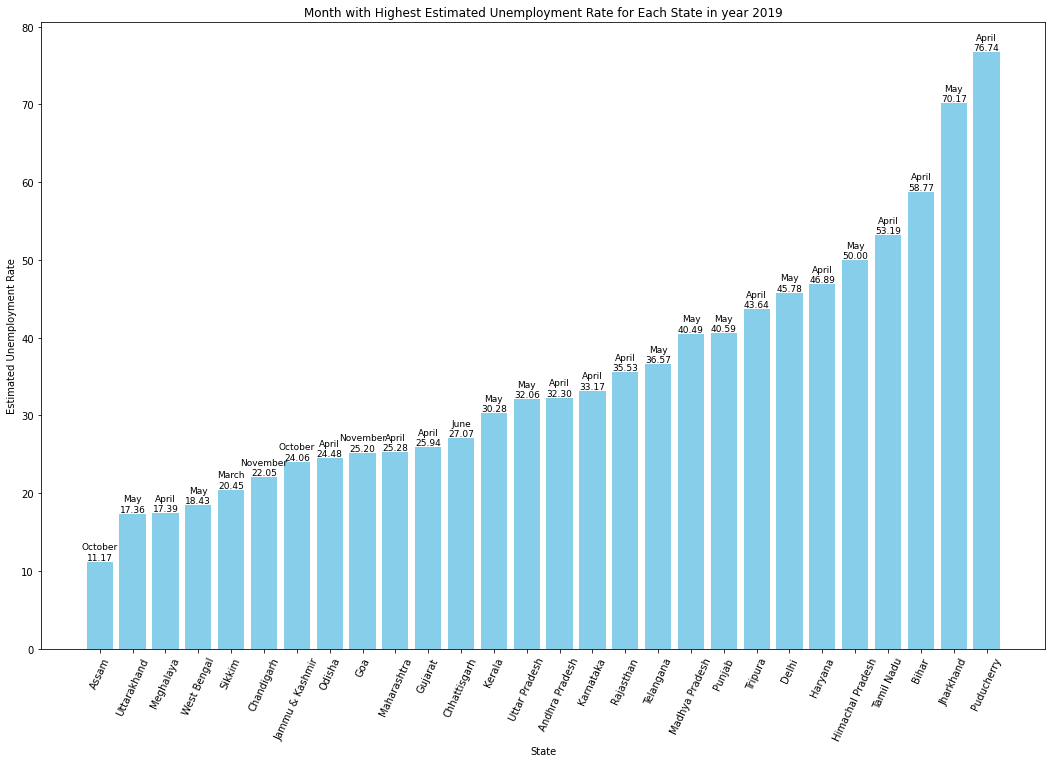

In [43]:
# Lets check in which month does every state got highest estimated unemployment rate in year 2019
# Convert the 'Date' column to datetime if it's not already in datetime format
classify1['Date'] = pa.to_datetime(classify1['Date'])

# Extract the month from the 'Date' column and create a new 'Month' column with month names
classify1['Month'] = classify1['Date'].dt.strftime('%B')

# Find the month with the highest estimated unemployment rate for each state
highest_month = classify1.groupby('State')['Estimated Unemployment Rate'].idxmax()
highest_month_df = classify1.loc[highest_month, ['State', 'Month', 'Estimated Unemployment Rate']].copy()

# Sort the DataFrame by the highest unemployment rate in ascending order
highest_month_df.sort_values('Estimated Unemployment Rate', inplace=True)

# Create a bar graph to visualize the month with the highest estimated unemployment rate for each state
plt.figure(figsize=(18, 15))
plt.bar(highest_month_df['State'], highest_month_df['Estimated Unemployment Rate'], color='skyblue')

# Add text labels with the month and the corresponding unemployment rate above each bar
for x, y, month in zip(highest_month_df['State'], highest_month_df['Estimated Unemployment Rate'], highest_month_df['Month']):
    plt.text(x, y, f'{month}\n{y:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Month with Highest Estimated Unemployment Rate for Each State in year 2019')
plt.xticks(rotation=65)

# Adjust the spacing between the subplots
plt.subplots_adjust(bottom=0.3)

plt.show()


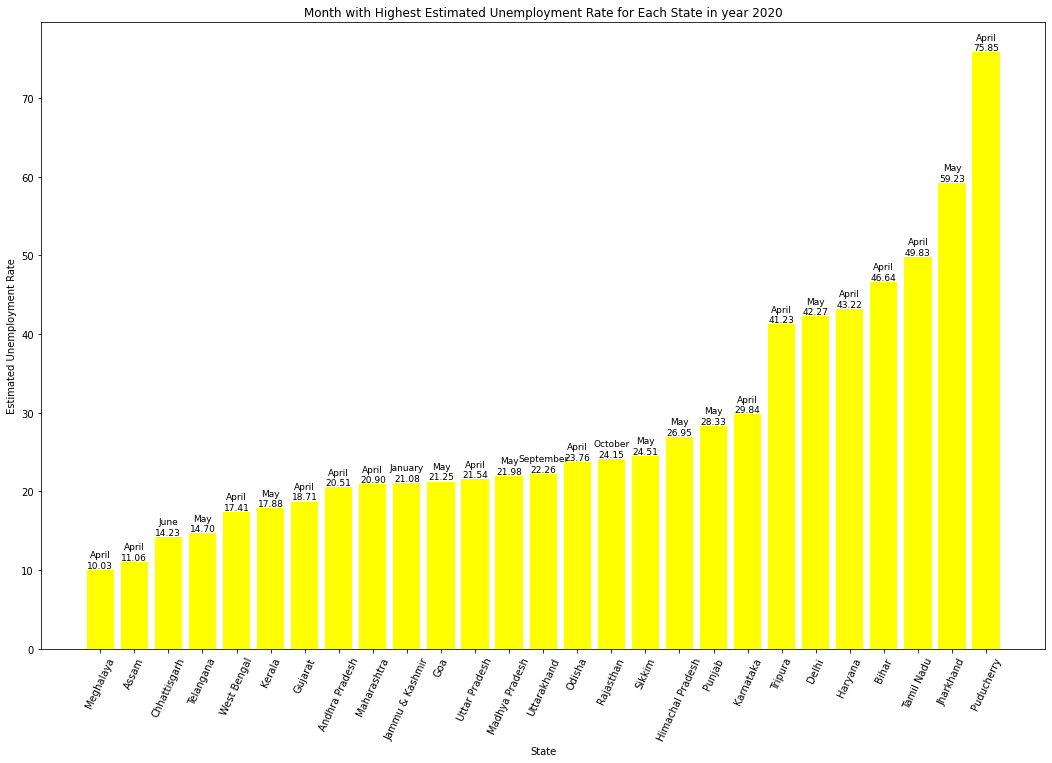

In [44]:

# Lets check in which month does every state got highest estimated unemployment rate in year 2020
# Convert the 'Date' column to datetime if it's not already in datetime format
classify2['Date'] = pa.to_datetime(classify2['Date'])

# Extract the month from the 'Date' column and create a new 'Month' column with month names
classify2['Month'] = classify2['Date'].dt.strftime('%B')

# Find the month with the highest estimated unemployment rate for each state
highest_month2 = classify2.groupby('State')['Estimated Unemployment Rate'].idxmax()
highest_month_df2 = classify2.loc[highest_month2, ['State', 'Month', 'Estimated Unemployment Rate']].copy()

# Sort the DataFrame by the highest unemployment rate in ascending order
highest_month_df2.sort_values('Estimated Unemployment Rate', inplace=True)

# Create a bar graph to visualize the month with the highest estimated unemployment rate for each state
plt.figure(figsize=(18, 15))
plt.bar(highest_month_df2['State'], highest_month_df2['Estimated Unemployment Rate'], color='yellow')

# Add text labels with the month and the corresponding unemployment rate above each bar
for x, y, month in zip(highest_month_df2['State'], highest_month_df2['Estimated Unemployment Rate'], highest_month_df2['Month']):
    plt.text(x, y, f'{month}\n{y:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Month with Highest Estimated Unemployment Rate for Each State in year 2020')
plt.xticks(rotation=65)

# Adjust the spacing between the subplots
plt.subplots_adjust(bottom=0.3)

plt.show()

In [46]:
# Concatenate the two datasets
combined_data = pa.concat([classify1, classify2])

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column to categorical data type with the custom sort order
combined_data['Month'] = pa.Categorical(combined_data['Month'], categories=month_order, ordered=True)

# Calculate the mean Estimated Unemployment Rate for each month and state
monthly_data = combined_data.groupby(['Month', 'State'])['Estimated Unemployment Rate'].mean().reset_index()

# Get a list of unique states
states = combined_data['State'].unique()

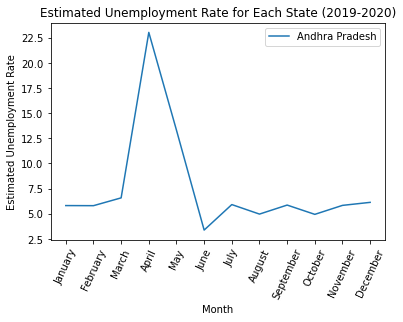

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


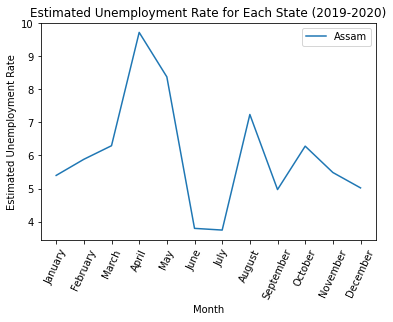

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


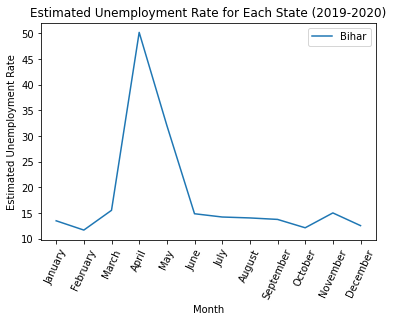

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


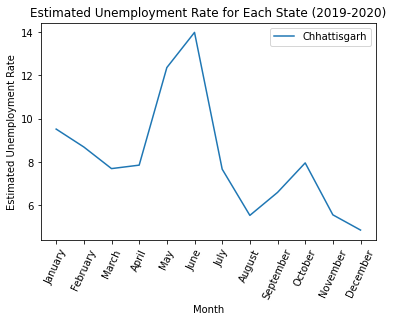

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


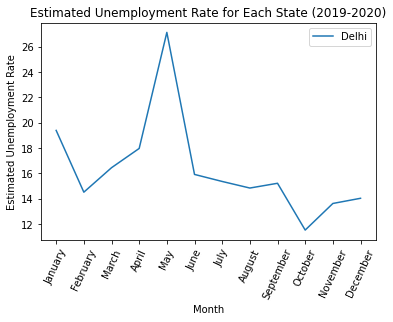

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


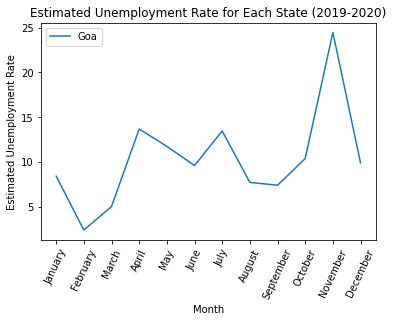

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


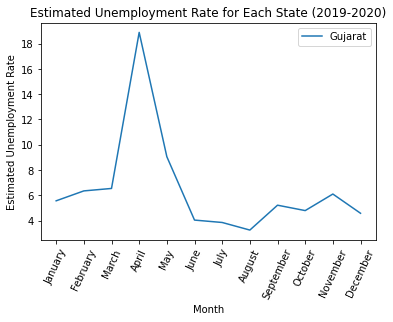

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


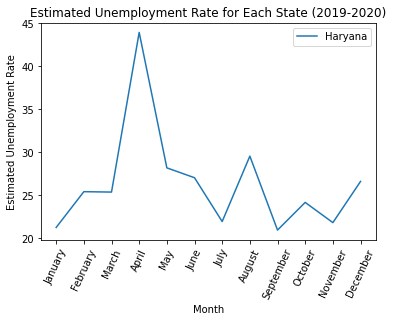

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


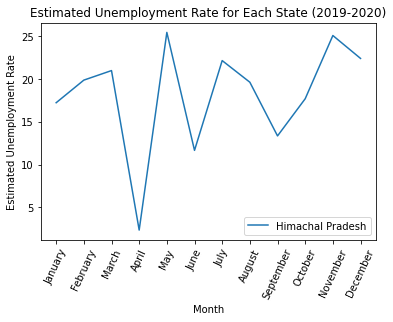

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


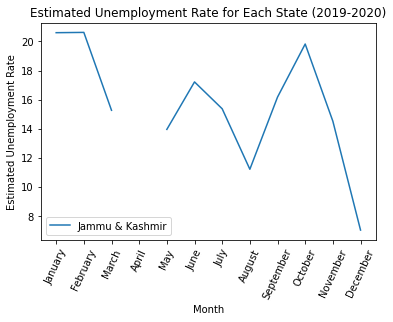

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


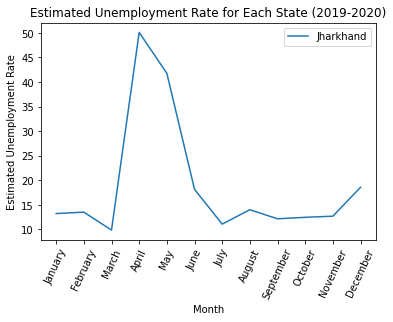

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


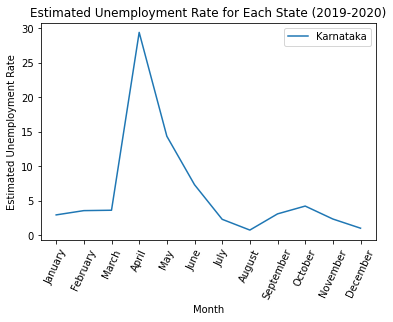

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


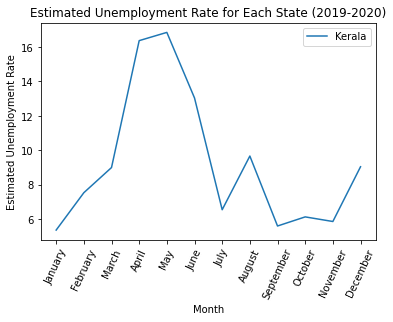

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


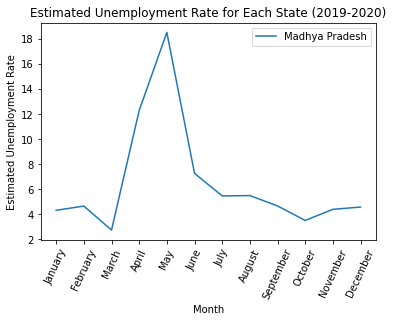

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


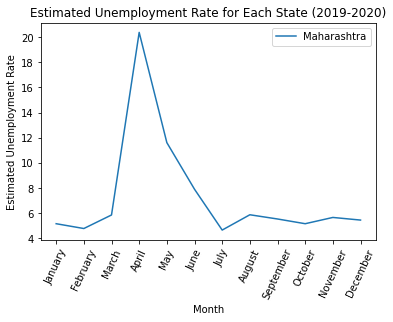

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


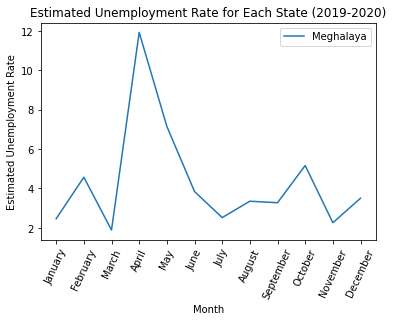

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


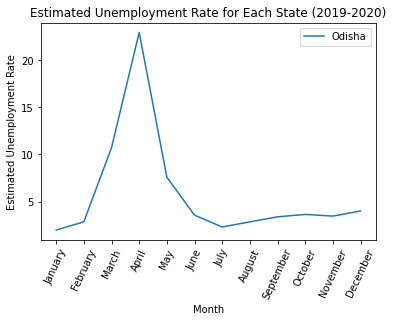

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


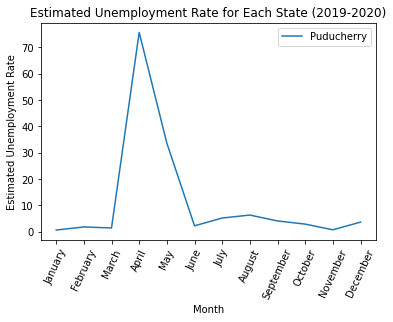

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


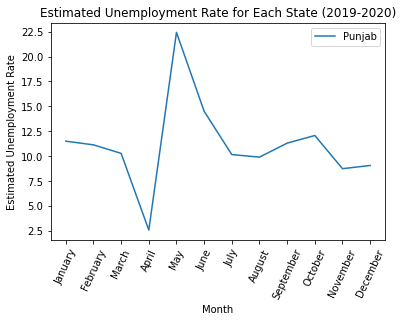

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


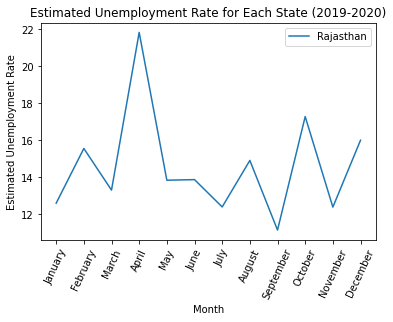

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


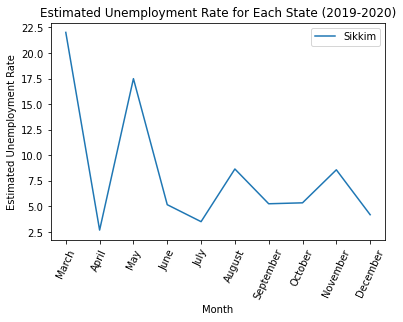

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


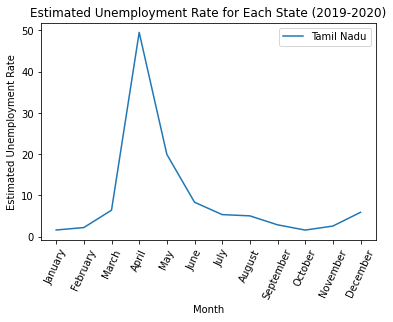

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


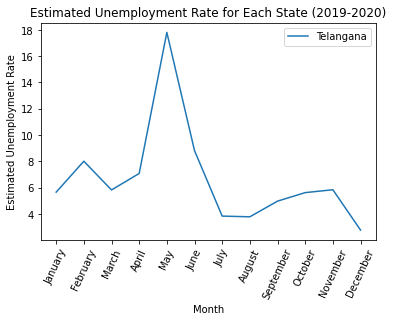

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


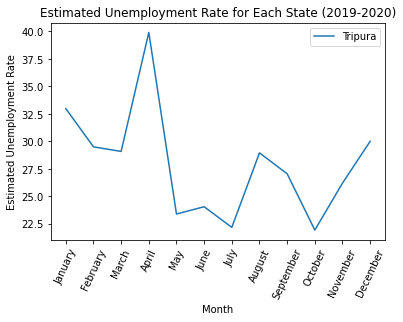

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


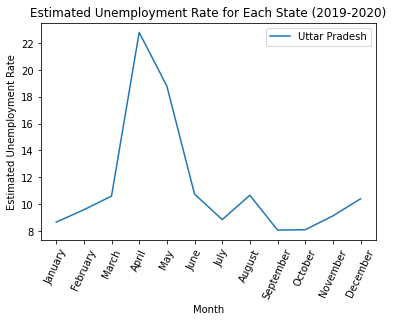

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


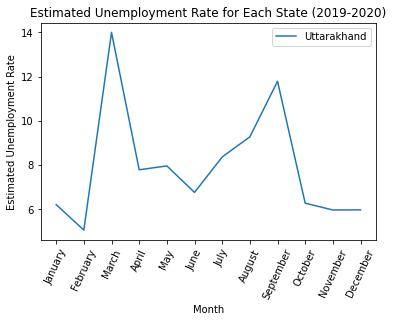

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


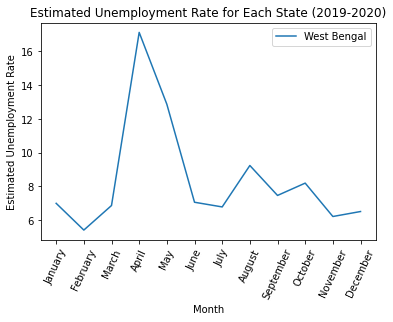

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


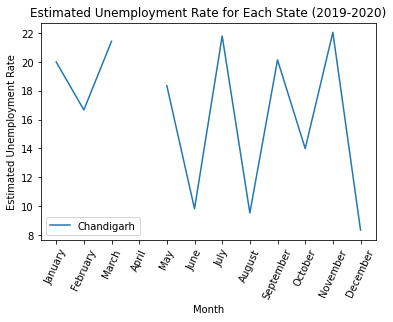

From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july


In [45]:


# Create separate line plot graphs for each state
for state in states:
    state_data = monthly_data[monthly_data['State'] == state]
    plt.plot(state_data['Month'], state_data['Estimated Unemployment Rate'], label=state)

    # Set the x-axis label as 'Month'
    plt.xlabel('Month')

    # Set the y-axis label as 'Estimated Unemployment Rate'
    plt.ylabel('Estimated Unemployment Rate')

    # Set the title of the graph
    plt.title('Estimated Unemployment Rate for Each State (2019-2020)')

    # Add a legend to differentiate the states
    plt.legend()

    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=65)

    # Display the line plot
    plt.show()

    print("From the above data,we can see that the Unemployment rate is very high in the month April-May and low in June-july")